In [1]:
from google.colab import files
from io import BytesIO
from PIL import Image
from skimage import io

uploaded = files.upload()

import matplotlib.pyplot as plt

Saving image.png to image.png


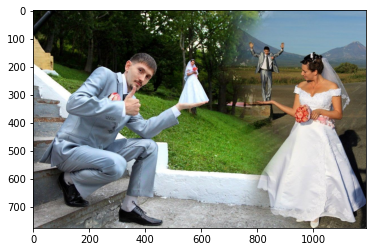

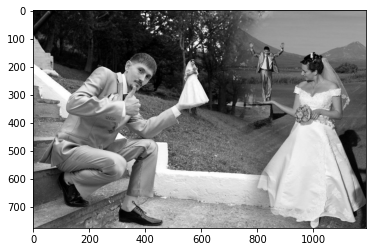

In [2]:
# Загрузка изображения и преобразование цветного к полутоновому

from PIL import Image, ImageDraw 
from skimage import img_as_float

image = io.imread(BytesIO(uploaded['image.png']))
image_grey = image.copy()

width = image.shape[0]
height = image.shape[1]

for i in range(width):
  for j in range(height):
    r = image[i,j][0] * 0.3
    g = image[i,j][1] * 0.59
    b = image[i,j][2] * 0.11
    mean = r + g + b
    image_grey[i,j] = [mean, mean, mean]

plt.imshow(image)
plt.show()
plt.close()

plt.imshow(image_grey)
plt.show()
plt.close()

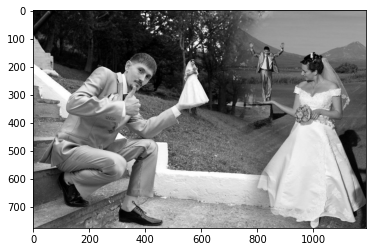

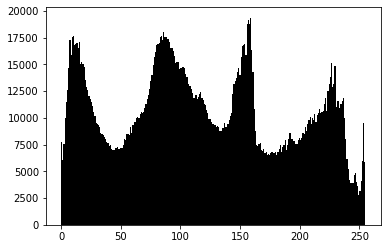

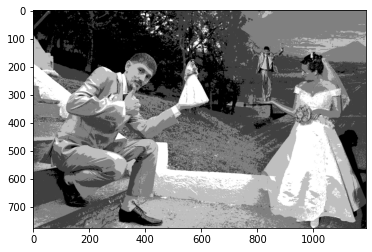

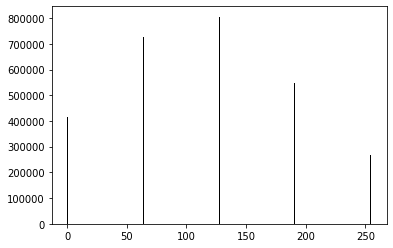

In [3]:
# Квантование по яркости

qLevels = 4 # Уровень квантования

plt.imshow(image_grey)
plt.show()
plt.close()

histogram = plt.hist(image_grey.ravel(), bins = 256, color = 'black', )
plt.show()

q_image_grey = image_grey.copy()

for i in range(width):
  for j in range(height):
    r = round(round(q_image_grey[i,j][0]/(255/qLevels))*(255/qLevels)) # Цвет на уровень квантования в квдрат и делим на q_i
    g = round(round(q_image_grey[i,j][1]/(255/qLevels))*(255/qLevels))
    b = round(round(q_image_grey[i,j][2]/(255/qLevels))*(255/qLevels))
    q_image_grey[i,j] = [r,g,b]

plt.imshow(q_image_grey)
plt.show()
plt.close()


histogram = plt.hist(q_image_grey.ravel(), bins = 256, color = 'black', )
plt.show()


Saving park.jpg to park.jpg


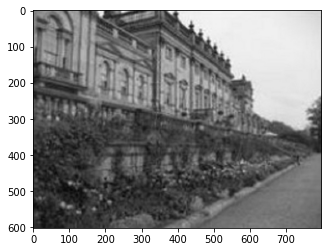

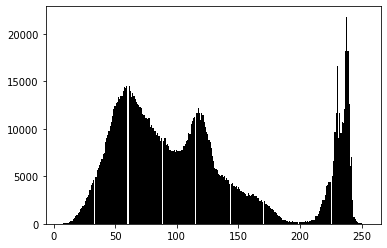

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide


149


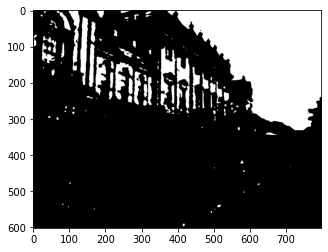

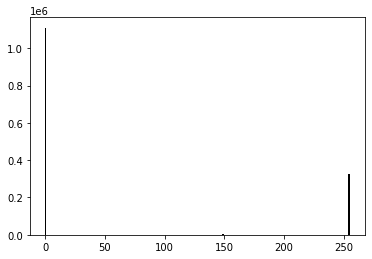

In [4]:
# Бинаризация методом Оцу глобальная

import numpy as np

uploaded = files.upload()

image_otsu = io.imread(BytesIO(uploaded['park.jpg']))

plt.imshow(image_otsu)
plt.show()
plt.close()

histogram = plt.hist(image_otsu.ravel(), bins = 256, color = 'black', )
plt.show()

pixel_number = image_otsu.shape[0] * image_otsu.shape[1]
mean_weight = 1.0/pixel_number
hist, bins = np.histogram(image_otsu, np.arange(0,257))
final_thresh = -1
final_value = -1
intensity_arr = np.arange(256)

for t in bins[1:-1]:
  pcb = np.sum(hist[:t])
  pcf = np.sum(hist[t:])
  Wb = pcb * mean_weight
  Wf = pcf * mean_weight

  mub = np.sum(intensity_arr[:t]*hist[:t]) / float(pcb)
  muf = np.sum(intensity_arr[t:]*hist[t:]) / float(pcf)
  #print mub, muf
  value = Wb * Wf * (mub - muf) ** 2

  if value > final_value: # Веса значения и выбирает максимальный порог
    final_thresh = t
    final_value = value

# перебирает порог и считает дисперсию, возвращает порог с макс. дисперсией

final_img = image_otsu.copy()
print(final_thresh)
final_img[image_otsu > final_thresh] = 255 # Всё что больше в белый
final_img[image_otsu < final_thresh] = 0 # Всё что меньше в чёрный

plt.imshow(final_img)
plt.show()
plt.close()

histogram = plt.hist(final_img.ravel(), bins = 256, color = 'black', )
plt.show()

(602, 798, 3)


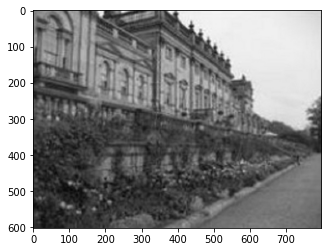

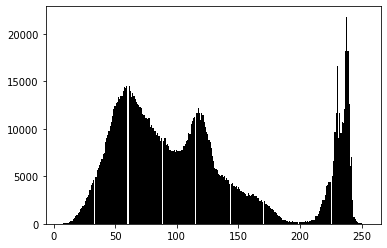

(201, 266, 3)
(200, 266, 3)
(201, 266, 3)
(201, 266, 3)
(200, 266, 3)
(201, 266, 3)
(201, 266, 3)
(200, 266, 3)
(201, 266, 3)
115 94 66 156 104 79 169 152 94


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in true_divide


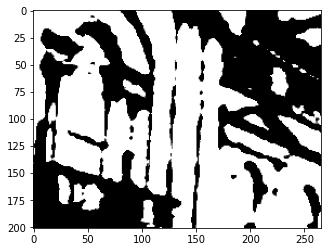

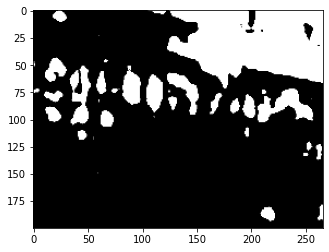

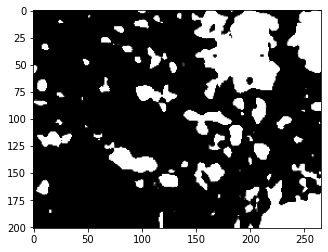

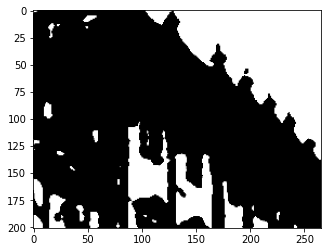

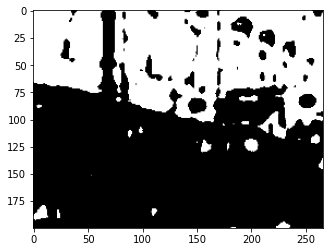

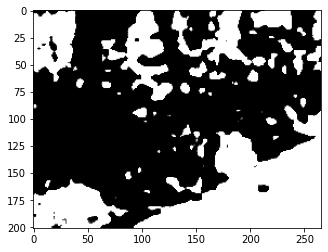

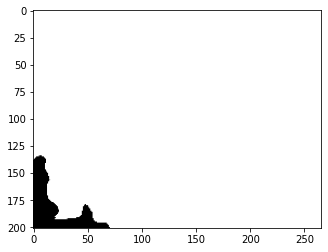

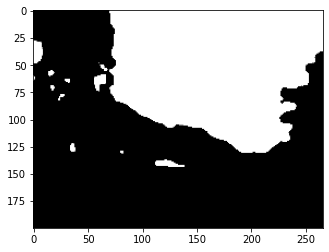

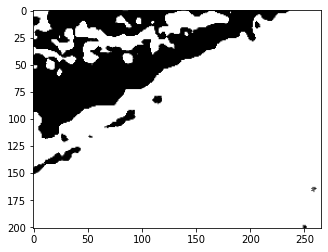

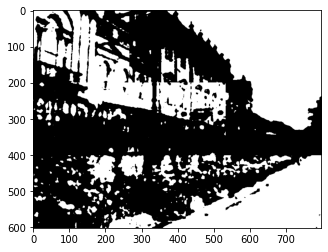

In [5]:
# Бинаризация методом Оцу локальная (с предварительным разбиением на фрагменты - по каждому своя бинаризация)
# Изображение на 9

#uploaded = files.upload()

image_otsu = io.imread(BytesIO(uploaded['park.jpg']))

imageSlice1 = image_otsu[:round(image_otsu.shape[0]/3), :round(image_otsu.shape[1]/3)]
imageSlice2 = image_otsu[round(image_otsu.shape[0]/3):round(image_otsu.shape[0]*2/3), :round(image_otsu.shape[1]/3)]
imageSlice3 = image_otsu[round(image_otsu.shape[0]*2/3):round(image_otsu.shape[0]), :round(image_otsu.shape[1]/3)]
imageSlice4 = image_otsu[:round(image_otsu.shape[0]/3),round(image_otsu.shape[1]/3):round(image_otsu.shape[1]*2/3)]
imageSlice5 = image_otsu[round(image_otsu.shape[0]/3):round(image_otsu.shape[0]*2/3), round(image_otsu.shape[1]/3):round(image_otsu.shape[1]*2/3)]
imageSlice6 = image_otsu[round(image_otsu.shape[0]*2/3):round(image_otsu.shape[0]), round(image_otsu.shape[1]/3):round(image_otsu.shape[1]*2/3)]
imageSlice7 = image_otsu[:round(image_otsu.shape[0]/3), round(image_otsu.shape[1]*2/3):round(image_otsu.shape[1])]
imageSlice8 = image_otsu[round(image_otsu.shape[0]/3):round(image_otsu.shape[0]*2/3), round(image_otsu.shape[1]*2/3):round(image_otsu.shape[1])]
imageSlice9 = image_otsu[round(image_otsu.shape[0]*2/3):round(image_otsu.shape[0]), round(image_otsu.shape[1]*2/3):round(image_otsu.shape[1])]

print(image_otsu.shape)

plt.imshow(image_otsu)
plt.show()
plt.close()

histogram = plt.hist(image_otsu.ravel(), bins = 256, color = 'black', )
plt.show()

def calcThresh(image):
  image_copy = image.copy()
  pixel_number = image_copy.shape[0] * image_copy.shape[1]
  print(image_copy.shape)

  mean_weight = 1.0/pixel_number
  hist, bins = np.histogram(image_copy, np.arange(0,257))
  final_thresh = -1
  final_value = -1
  intensity_arr = np.arange(256)

  for t in bins[1:-1]:
    pcb = np.sum(hist[:t])
    pcf = np.sum(hist[t:])
    Wb = pcb * mean_weight
    Wf = pcf * mean_weight

    mub = np.sum(intensity_arr[:t]*hist[:t]) / float(pcb)
    muf = np.sum(intensity_arr[t:]*hist[t:]) / float(pcf)
  #print mub, muf
    value = Wb * Wf * (mub - muf) ** 2

    if value > final_value:
      final_thresh = t
      final_value = value

  return final_thresh
    
thresh1 = calcThresh(imageSlice1)
thresh2 = calcThresh(imageSlice2)
thresh3 = calcThresh(imageSlice3)
thresh4 = calcThresh(imageSlice4)
thresh5 = calcThresh(imageSlice5)
thresh6 = calcThresh(imageSlice6)
thresh7 = calcThresh(imageSlice7)
thresh8 = calcThresh(imageSlice8)
thresh9 = calcThresh(imageSlice9)

print(thresh1, thresh2, thresh3, thresh4, thresh5, thresh6, thresh7, thresh8, thresh9)

imageSlice1[imageSlice1 > thresh1] = 255
imageSlice1[imageSlice1 < thresh1] = 0

plt.imshow(imageSlice1)
plt.show()
plt.close()

imageSlice2[imageSlice2 > thresh2] = 255
imageSlice2[imageSlice2 < thresh2] = 0

plt.imshow(imageSlice2)
plt.show()
plt.close()

imageSlice3[imageSlice3 > thresh3] = 255
imageSlice3[imageSlice3 < thresh3] = 0

plt.imshow(imageSlice3)
plt.show()
plt.close()

imageSlice4[imageSlice4 > thresh4] = 255
imageSlice4[imageSlice4 < thresh4] = 0

plt.imshow(imageSlice4)
plt.show()
plt.close()

imageSlice5[imageSlice5 > thresh5] = 255
imageSlice5[imageSlice5 < thresh5] = 0

plt.imshow(imageSlice5)
plt.show()
plt.close()

imageSlice6[imageSlice6 > thresh6] = 255
imageSlice6[imageSlice6 < thresh6] = 0

plt.imshow(imageSlice6)
plt.show()
plt.close()

imageSlice7[imageSlice7 > thresh7] = 255
imageSlice7[imageSlice7 < thresh7] = 0

plt.imshow(imageSlice7)
plt.show()
plt.close()

imageSlice8[imageSlice8 > thresh8] = 255
imageSlice8[imageSlice8 < thresh8] = 0

plt.imshow(imageSlice8)
plt.show()
plt.close()

imageSlice9[imageSlice9 > thresh9] = 255
imageSlice9[imageSlice9 < thresh9] = 0

plt.imshow(imageSlice9)
plt.show()
plt.close()

for i in range(imageSlice2.shape[0]):
  for j in range(imageSlice2.shape[1]):
    image_otsu[i,j] = imageSlice1[i,j]
    image_otsu[i+200,j] = imageSlice2[i,j]
    image_otsu[i+401,j] = imageSlice3[i,j]
    image_otsu[i,j+266] = imageSlice4[i,j]
    image_otsu[i+200,j+266] = imageSlice5[i,j]
    image_otsu[i+401,j+266] = imageSlice6[i,j]
    image_otsu[i,j+532] = imageSlice7[i,j]
    image_otsu[i+200,j+532] = imageSlice8[i,j]
    image_otsu[i+401,j+532] = imageSlice9[i,j]

plt.imshow(image_otsu)
plt.show()
plt.close()

(602, 798, 3)


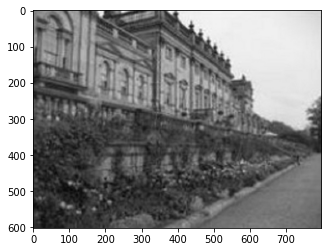

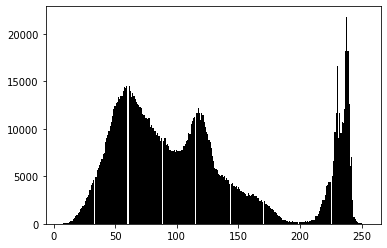

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in true_divide


[149, 88, 59, 115, 199, 167, 231, 0, 255]
[0, 59, 88, 115, 149, 167, 199, 231, 255]


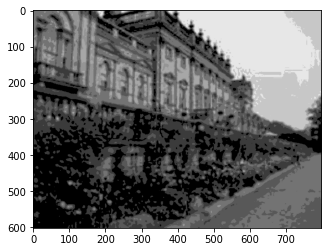

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,  59.,  59.,  59.,  59.,  59.,  59.,
        59.,  59.,  59.,  59.,  59.,  59.,  59.,  59.,  59.,  59.,  59.,
        59.,  59.,  59.,  59.,  59.,  59.,  59.,  59.,  59.,  59.,  59.,
        59.,  88.,  88.,  88.,  88.,  88.,  88.,  88.,  88.,  88.,  88.,
        88.,  88.,  88.,  88.,  88.,  88.,  88.,  88.,  88.,  88.,  88.,
        88.,  88.,  88.,  88.,  88.,  88., 115., 115., 115., 115., 115.,
       115., 115., 115., 115., 115., 115., 115., 115., 115., 115., 115.,
       115., 115., 115., 115., 115., 115., 115., 115., 115., 115., 115.,
       115., 115., 115., 115., 115., 115., 115., 14

In [7]:
# Бинаризация методом Оцу иерархическая (выполняется с иерархическим разбиением каждой уже полученной  области, пока возможно разбивать). 
# Квантование с использованием найденных порогов


image_otsu_quant = io.imread(BytesIO(uploaded['park.jpg']))

gray_image_otsu_quant = image_otsu_quant.copy()

print(image_otsu_quant.shape)

plt.imshow(image_otsu_quant)
plt.show()
plt.close()

histogram = plt.hist(image_otsu_quant.ravel(), bins = 256, color = 'black', )
plt.show()

array_limits = []

def calcThresh(image, min_limit, max_limit, countDiv):
  if (countDiv == 0):
    return;
  image_copy = image_otsu_quant.copy()
  pixel_number = image_copy.shape[0] * image_copy.shape[1]
  #print(image_copy.shape)

  mean_weight = 1.0/pixel_number
  hist, bins = np.histogram(image_copy, np.arange(0,257))
  final_thresh = -1
  final_value = -1
  intensity_arr = np.arange(256)

  for t in bins[min_limit:max_limit]:
    pcb = np.sum(hist[min_limit:t])
    pcf = np.sum(hist[t:max_limit])
    Wb = pcb * mean_weight
    Wf = pcf * mean_weight

    mub = np.sum(intensity_arr[min_limit:t]*hist[min_limit:t]) / float(pcb)
    muf = np.sum(intensity_arr[t:max_limit]*hist[t:max_limit]) / float(pcf)
  #print mub, muf
    value = Wb * Wf * (mub - muf) ** 2

    if value > final_value:
      final_thresh = t
      final_value = value
  array_limits.append(final_thresh)

  calcThresh(image_otsu_quant, min_limit, final_thresh, countDiv - 1)
  calcThresh(image_otsu_quant, final_thresh, max_limit, countDiv - 1)
  return;

calcThresh(image_otsu_quant, 0, 255, 3) # в промежутке от 0 до порога и до 255, глубина 3

array_limits.append(0)
array_limits.append(255)

print(array_limits)

array_limits.sort()

print(array_limits)

def color (i):
  for k in range(1, len(array_limits)):
    if i <= array_limits[k]:
        return array_limits[k-1];
  return 255
  
cool = np.zeros(256)
for i in range(256):
  cool[i] = color(i)

#image_otsu_quant[image_otsu_quant <= array_limits[0]] = array_limits[0]

for i in range(gray_image_otsu_quant.shape[0]):
  for j in range(gray_image_otsu_quant.shape[1]):
    gray_image_otsu_quant[i,j] = cool[gray_image_otsu_quant[i,j]]

#image_otsu_quant[image_otsu_quant > array_limits[len(array_limits)-1]] = array_limits[len(array_limits)-1]

plt.imshow(gray_image_otsu_quant)
plt.show()
plt.close()

cool

In [ ]:
#for i in range(image_otsu_quant.shape[0]):
#  for j in range(image_otsu_quant.shape[1]):
#    for k in range(1, len(array_limits)):
#      if image_otsu_quant[i,j][0] > array_limits[k-1] and image_otsu_quant[i,j][0] <= array_limits[k]:
#        image_otsu_quant[i,j] = array_limits[k];
#        break;